# COMBINED CYCLE POWER PLANT

# 1.CLEAN AND PREPARE THE DATASET

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the file

In [2]:
df= pd.read_csv("PowerPlant.csv")
df

,Temperature,Exhaust Vaccum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


# CHECKING FOR NULL VALUES

In [3]:
df.isna().any()

Temperature                     False
Exhaust Vaccum                  False
Ambient Pressure                False
Relative Humidity               False
Net Hourly Electrical Energy    False
dtype: bool

# SPLITTING X AND Y VARIABLES

Temperature, Exhaust Vaccum, Ambient Pressure, Relative Humidity - INDEPENDENT VARIABLES (x)

Net Hourly Electrical Energy - DEPENDENT VARIABLE (y)

In [4]:
x= df.iloc[:, [0,1,2,3]]
x

,Temperature,Exhaust Vaccum,Ambient Pressure,Relative Humidity
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [5]:
y= df.iloc[:, [4]]
y

,Net Hourly Electrical Energy
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


# 2.Split the dataset in the ratio 75:25 for train-test split

# SPLITTING THE DATASET INTO TRAIN AND TEST

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# NORMALIZE

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# 3. Build linear regression model, polynomial model, lasso model and ridge model

# MODEL BUILDING AND PREDICTING

# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)
y_pred1=ml.predict(x_test)
print(y_pred1)

[[431.43406277]
 [458.40407477]
 [462.54274093]
 ...
 [473.55995225]
 [475.16753906]
 [441.99535382]]


# Polynomial Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lc=LinearRegression()
poly=PolynomialFeatures(degree=3)
poly_xtrain= poly.fit_transform(x_train)
poly_xtest= poly.fit_transform(x_test)
lc.fit(poly_xtrain, y_train)
y_pred2=lc.predict(poly_xtest)
print(y_pred2)

[[434.76083527]
 [458.21466863]
 [460.45532057]
 ...
 [471.81679194]
 [477.25282247]
 [440.34792134]]


# Lasso Regression

In [10]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred3=lasso.predict(x_test)
print(y_pred3)

[431.58506104 458.5088475  462.81604722 ... 473.14324274 475.01967899
 441.88861038]


# Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred4=ridge.predict(x_test)
print(y_pred4)

[[431.43387831]
 [458.40465521]
 [462.54357203]
 ...
 [473.55943203]
 [475.16713087]
 [441.99499224]]


# 4. Print the MSE, RMSE and R 2 for each model

# Performance measure for each model

# Linear Regression

Mean Squared Error

In [12]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_pred1, y_test)
print(mse)

19.86565397007805


Root Mean Squared Error

In [13]:
from sklearn.metrics import mean_squared_error
import math
mse= mean_squared_error(y_pred1, y_test)
rmse=math.sqrt(mse)
print(rmse)

4.457090303110096


R2 score

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.9322646991894663

# Polynomial Regression

Mean Squared Error

In [15]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_pred2, y_test)
print(mse)

16.26598069940195


Root Mean Squared Error

In [16]:
from sklearn.metrics import mean_squared_error
import math
mse= mean_squared_error(y_pred2, y_test)
rmse=math.sqrt(mse)
print(rmse)

4.033110548869439


R2 score

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.9445383928809066

# Lasso Regression

Mean Squared Error

In [18]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_pred3, y_test)
print(mse)

19.924390454573526


Root Mean Squared Error

In [19]:
from sklearn.metrics import mean_squared_error
import math
mse= mean_squared_error(y_pred3, y_test)
rmse=math.sqrt(mse)
print(rmse)

4.463674546220135


R2 score

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred3)

0.9320644272300409

# Ridge Regression

Mean Squared Error

In [21]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_pred4, y_test)
print(mse)

19.865773006398964


Root Mean Squared Error

In [22]:
from sklearn.metrics import mean_squared_error
import math
mse= mean_squared_error(y_pred4, y_test)
rmse=math.sqrt(mse)
print(rmse)

4.45710365668098


R2 score

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred4)

0.9322642933150351

Text(0.5, 1.0, 'Actual vs. Predicted')

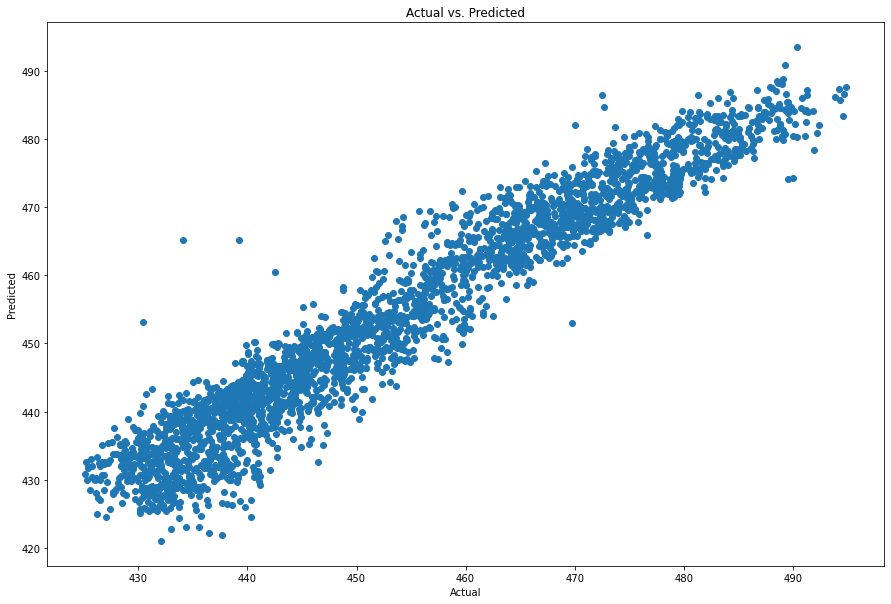

In [19]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')